***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date:11/23}}$<br>
***

# KINETICS
***
$\mathbf{\text{Micro Kinetic Model for (a Simple 4-Step Mechanism) CO Oxidation}}:$<br>
#### [Link to Relevant Paper](https://pubs.acs.org/doi/10.1021/cs500377j) 

Rxn 1:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; $ CO(g) + * \rightleftharpoons CO^{*} $  <br> 

Rxn 2:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}(g) + * \rightleftharpoons {O_2}^{*} $  <br> 

Rxn 3:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {O_2}^* + * \rightleftharpoons 2{O}^* $  <br> 

Rxn 4:&emsp;   
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O}^{*} \rightleftharpoons {{CO}_2}^* + * $  <br> 

Rxn 5:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO}^{*} + {O_2}^{*} \rightleftharpoons {{CO}_2}^* + O^* $  <br> 

Rxn 6:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {CO_2}^{*} \rightleftharpoons {{CO}_2}(g) + * $  <br> 

---------------------------------
Rxn 7:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}{(g)} + *\rightleftharpoons {{NO}^*} $  <br> 

Rxn 8:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O}^* \rightleftharpoons {{{NO}_2}^*} + *$  <br> 

Rxn 9:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {NO}^*  + {O_2}^* \rightleftharpoons {{{NO}_2}^*} + O^*$  <br> 

Rxn 10:&emsp;  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$ {{{NO}_2}^*} + *\rightleftharpoons {NO}{(g)} + * $  <br> 

---------------------------------

***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$


Rate Equations (CO Oxidation):&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \theta_{{CO}_2} \cdot \theta_{*} $$

$$r_5 = k_{5}^f \cdot \theta_{CO} \cdot \theta_{O_2} - k_{5}^r \cdot \theta_{{CO}_2} \cdot \theta_{O} $$

$$r_6 = k_{6}^f \cdot \theta_{{CO}_2}  - k_{6}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*} $$



Rate Equations (NO Oxidation):&emsp;

$$r_7 = k_{7}^f \cdot \textrm{P}_{NO} \cdot \theta_{*} - k_{7}^r \cdot \theta_{NO} $$

$$r_8 = k_{8}^f \cdot \theta_{NO} \cdot \theta_{O} - k_{8}^r \cdot \theta_{{NO}_2}\cdot  \theta_{*} $$

$$r_9 = k_{9}^f \cdot \theta_{NO} \cdot \theta_{O_2} - k_{9}^r \cdot \theta_{{NO}_2} \cdot \theta_{O} $$

$$r_{10} = k_{10}^f \cdot \theta_{{NO}_2} - k_{10}^r \cdot \textrm{P}_{{NO}_2} \cdot \theta_{*} $$





In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------------------------------------------------------------------

## Case Analysis

In [2]:
# Loading the Excel workbook
df = pd.read_excel('DOC_model.xlsm', sheet_name='Cases')
df.columns = df.iloc[0]
df = df.iloc[1:]

############ Cleaning up the Dataframe:
df = df[df.isin(['error', 'error']) == False]
df = df.dropna()

############ Specifying composition:
#Extracting GHSV 10% of 30,000 i.e 29,700- 30,300 1/h
th_df = df.loc[(df['GHSV'] >= 29700.0) & (df['GHSV'] <= 30300.0)]

#Extracting H2O conc ~0%
th_df = df.loc[(df['Water'] == 0.0)]


############ Removing zero/nan terms
#Extracting only those non-zero X_CO and X_NO
th_df = th_df.loc[th_df['R1: X_CO'] != 0]
th_df = th_df.loc[th_df['R2:X_NO'] != 0]

#Extracting only those X_CO and X_NO that are greater than 0 and less than 1
th_df = th_df.loc[th_df['R1: X_CO'] > 0]
th_df = th_df.loc[th_df['R2:X_NO'] > 0]
th_df = th_df.loc[th_df['R1: X_CO'] < 1]
th_df = th_df.loc[th_df['R2:X_NO'] < 1]

#Extracting Specific Catalysts
th_df_PtPd = th_df.loc[th_df['Catalyst'] == 'PtPd']
th_df_PtCu = th_df.loc[th_df['Catalyst'] == 'PtCu']
th_df_PdCu = th_df.loc[th_df['Catalyst'] == 'PdCu']


In [3]:
print(np.shape(th_df))
print(np.shape(th_df_PtPd))
print(np.shape(th_df_PtCu))
print(np.shape(th_df_PdCu))

(56, 14)
(20, 14)
(18, 14)
(18, 14)


In [4]:
th_df_PtCu

,Index,Catalyst,Run,ToL,GHSV,Cat Temp,Oxygen,Water,Carbon monoxide,Nitric oxide,Carbon Dioxide,Nitrogen Dioxide,R1: X_CO,R2:X_NO
45,45,PtCu,20230522,112,30036.04102,193.033522,0.100548,0,1019.704682,197.846307,0,0,0.999758,0.694902
46,46,PtCu,20230522,119,29444.477964,193.484166,0.102568,0,1040.191362,101.367208,0,0,0.999391,0.897547
49,49,PtCu,20230522,145,29291.144413,190.297197,0.103105,0,522.155649,101.897846,0,0,0.999346,0.797964
50,50,PtCu,20230522,151,29888.085315,189.622759,0.101045,0,511.726875,199.725374,0,0,0.999499,0.550299
53,53,PtCu,20230522,232,30041.418866,181.393005,0.10053,0,1019.52214,198.705961,0,0,0.998786,0.330557
57,57,PtCu,20230522,262,29282.272891,178.404663,0.103136,0,510.382817,101.01044,0,0,0.999146,0.661953
58,58,PtCu,20230522,269,29884.591639,177.780622,0.101057,0,500.09614,199.748723,0,0,0.998939,0.360586
61,61,PtCu,20230522,329,30032.215919,164.983865,0.10056,0,1025.004822,196.97616,0,0,0.922445,0.059985
62,62,PtCu,20230522,339,29446.030709,166.424674,0.102562,0,1045.4097,101.361862,0,0,0.985865,0.342851
65,65,PtCu,20230522,361,29295.357701,162.715942,0.10309,0,518.105319,102.801057,0,0,0.999267,0.497513


In [5]:
## Making sure the vectors are sorted in the order of ascending temperature to help with plotting
def sort_vectors(x, y):
    # Combining x and y into a list of tuples
    combined = list(zip(x, y))

    # Sorting the list of tuples based on the values in x
    sorted_combined = sorted(combined, key=lambda pair: pair[0])

    # Unpack the sorted tuples back into separate x and y vectors
    sorted_x, sorted_y = zip(*sorted_combined)

    return list(sorted_x), list(sorted_y) #return sorted tuples as lists

OG_Temp_PtPd,OG_PtPd_X_CO_vals = sort_vectors(list(th_df_PtPd['Cat Temp']), list(th_df_PtPd['R1: X_CO']))
OG_Temp_PtCu,OG_PtCu_X_CO_vals = sort_vectors(list(th_df_PtCu['Cat Temp']), list(th_df_PtCu['R1: X_CO']))
OG_Temp_PdCu,OG_PdCu_X_CO_vals = sort_vectors(list(th_df_PdCu['Cat Temp']), list(th_df_PdCu['R1: X_CO']))


OG_Temp_PtPd,OG_PtPd_X_NO_vals = sort_vectors(list(th_df_PtPd['Cat Temp']), list(th_df_PtPd['R2:X_NO']))
OG_Temp_PtCu,OG_PtCu_X_NO_vals = sort_vectors(list(th_df_PtCu['Cat Temp']), list(th_df_PtCu['R2:X_NO']))
OG_Temp_PdCu,OG_PdCu_X_NO_vals = sort_vectors(list(th_df_PdCu['Cat Temp']), list(th_df_PdCu['R2:X_NO']))

In [6]:
def rearrange_vectors(a, b, c): #Function to remove values (lower than constant
                                    #c) from a and prepare b vector accordingly ready for fitting
    # Create a list of indices that would sort vector a
    sorted_indices = sorted(range(len(a)), key=lambda k: a[k])

    # Rearrange vector a based on the sorted order
    a = [a[i] for i in sorted_indices]
    # Rearrange vector b based on the sorted order
    b = [b[i] for i in sorted_indices]

    # Find the index of the first element in a that is greater than or equal to c
    index_to_remove = next((i for i, value in enumerate(a) if value >= c), len(a))

    # Remove the first n values in vector a that are less than c
    a = a[index_to_remove:]
    # Remove corresponding values in vector b
    b = b[index_to_remove:]

    return a, b

<IPython.core.display.Javascript object>


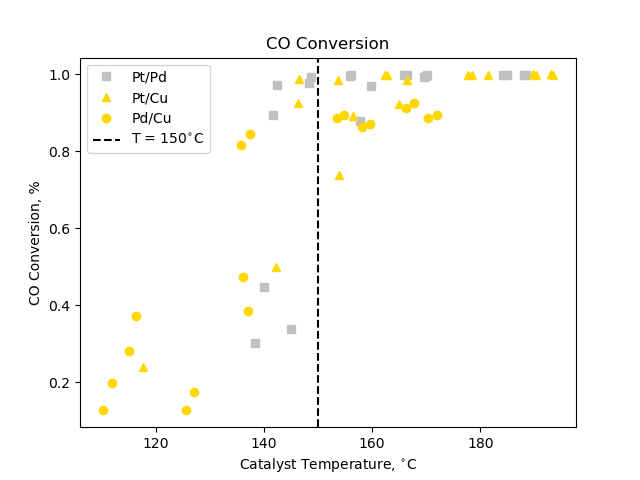

In [7]:
plt.figure() #CO Conv
plt.plot(OG_Temp_PtPd, OG_PtPd_X_CO_vals,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu, OG_PtCu_X_CO_vals,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu, OG_PdCu_X_CO_vals,'o', color="#FFD700", label='Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('CO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("CO Conversion, %")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


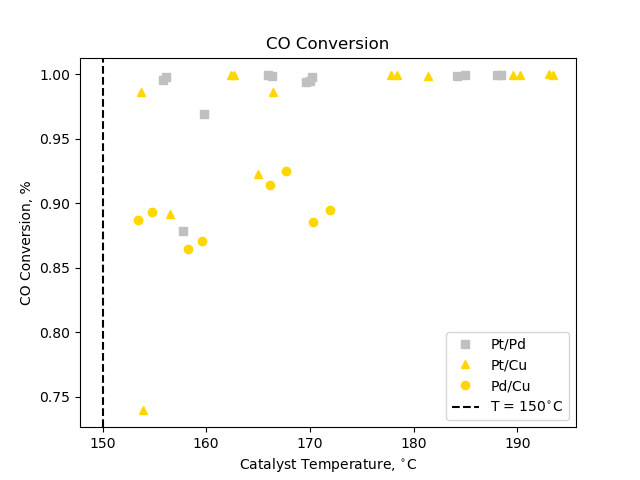

In [8]:
plt.figure() #CO Conv

OG_Temp_PtPd_150, OG_PtPd_X_CO_vals_150 = rearrange_vectors(OG_Temp_PtPd,OG_PtPd_X_CO_vals,150)
OG_Temp_PtCu_150, OG_PtCu_X_CO_vals_150 = rearrange_vectors(OG_Temp_PtCu,OG_PtCu_X_CO_vals,150)
OG_Temp_PdCu_150, OG_PdCu_X_CO_vals_150 = rearrange_vectors(OG_Temp_PdCu,OG_PdCu_X_CO_vals,150)

plt.plot(OG_Temp_PtPd_150, OG_PtPd_X_CO_vals_150,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu_150, OG_PtCu_X_CO_vals_150,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu_150, OG_PdCu_X_CO_vals_150,'o', color="#FFD700", label='Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('CO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("CO Conversion, %")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


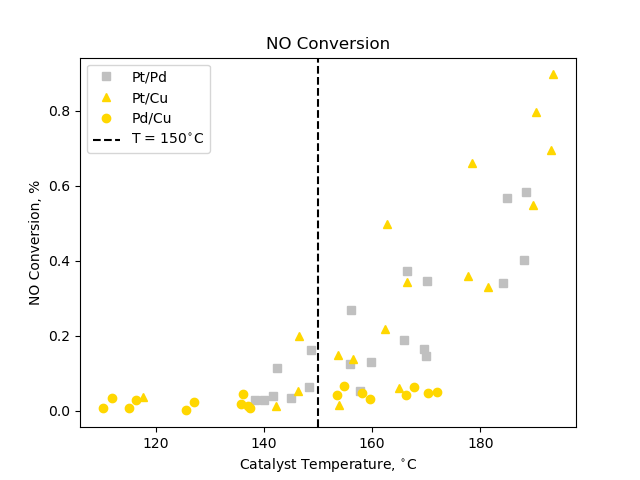

In [9]:
plt.figure() #NO Conv

plt.plot(OG_Temp_PtPd, OG_PtPd_X_NO_vals,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu, OG_PtCu_X_NO_vals,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu, OG_PdCu_X_NO_vals,'o', color="#FFD700", label='Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('NO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("NO Conversion, %")
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


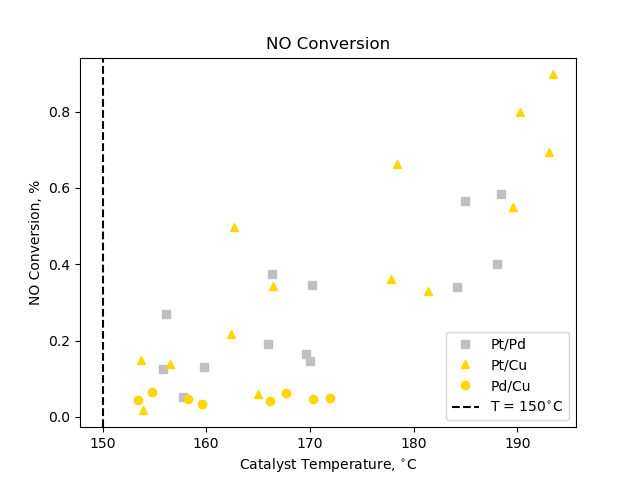

In [10]:
plt.figure() #NO Conv

OG_Temp_PtPd_150, OG_PtPd_X_NO_vals_150 = rearrange_vectors(OG_Temp_PtPd,OG_PtPd_X_NO_vals,150)
OG_Temp_PtCu_150, OG_PtCu_X_NO_vals_150 = rearrange_vectors(OG_Temp_PtCu,OG_PtCu_X_NO_vals,150)
OG_Temp_PdCu_150, OG_PdCu_X_NO_vals_150 = rearrange_vectors(OG_Temp_PdCu,OG_PdCu_X_NO_vals,150)

plt.plot(OG_Temp_PtPd_150, OG_PtPd_X_NO_vals_150,'s', color="silver",label='Pt/Pd') 
plt.plot(OG_Temp_PtCu_150, OG_PtCu_X_NO_vals_150,'^', color="#FFD700", label='Pt/Cu')
plt.plot(OG_Temp_PdCu_150, OG_PdCu_X_NO_vals_150,'o', color="#FFD700", label='Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('NO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("NO Conversion, %")
plt.legend(loc='best')
plt.show()

In [46]:
class PFR:
    def __init__(self,T=150, Feed_Mol_pcnt = [0.000511, 0.1019,0 , 0.0002, 0], Rate_Coeff = [], Ea_R = []):
        ######PFR Modelling
        self.Total_Volume = 1.0  #L
        self.Total_Pressure = 1.0 #atm
        self.Total_Flowrate = 658137 #*(1/3600) ## Total Flowrate L/s (GHSV * Cat.Vol) * (Convertion to per s)
        self.Volume_Step = 0.01 #Optional
        self.Volume = np.arange(0, self.Total_Volume+(2*self.Volume_Step), self.Volume_Step, dtype=float) #Volume array #Can be customized #mandatory
        self.T = T
        self.Gas_Species = ['CO','O2','CO2','NO','NO2']
        self.Surface_Species = ['*','CO*','O2*','O*','CO2*','NO*','NO2*']

        #Catalyst Info
        ##Site Densities: Pt/Pd Pd/Cu Pt/Cu Cu Only : 52 103 103 154 umol/g
        self.Site_density = 5e-6 #moles of sites/gram of catalyst
        self.Catalyst_gram =  0.14*(1000)*self.Total_Volume # mg/L -> grams
        #0.14 grams of catalyst per mililitre of reactor. #GHSV
        #NA = 6.022e23 #Avogadro's number (no. of molecules in a mole)
        
        ##Feed Info
        self.Feed_Mol_pcnt = Feed_Mol_pcnt
        #CO | O2 | CO2 | NO | NO2 |  #assume rest is inert if not balanced (i.e add up to 100%)

        self.Feed_Partial_Pressures = np.array(self.Feed_Mol_pcnt)  * self.Total_Pressure
        self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2 = list(self.Feed_Partial_Pressures)
        self.Feed_mol_frac = self.Feed_Partial_Pressures/self.Total_Pressure

        self.F_rate = self.Feed_mol_frac * self.Total_Flowrate * (1/22.4) #Initial Flowrate L/h -> mol/hr
        self.scale =22.00

        self.T0 = 150 #degrees Celsius
        
        self.Rate_Coeff = Rate_Coeff
        if self.Rate_Coeff == []:
            self.Rate_Coeff = np.array([135,1,169,1,91,1,2000,12.467,2000,12.467,91,1,151,1,50,0.5,50,0.5,91,1])
            
        self.k1f_o = self.Rate_Coeff[0]
        self.k1r_o = self.Rate_Coeff[1]
        self.k2f_o = self.Rate_Coeff[2]
        self.k2r_o = self.Rate_Coeff[3]
        self.k3f_o = self.Rate_Coeff[4]
        self.k3r_o = self.Rate_Coeff[5]
        self.k4f_o = self.Rate_Coeff[6]
        self.k4r_o = self.Rate_Coeff[7]
        self.k5f_o = self.Rate_Coeff[8]
        self.k5r_o = self.Rate_Coeff[9]
        self.k6f_o = self.Rate_Coeff[10]
        self.k6r_o = self.Rate_Coeff[11]
        self.k7f_o = self.Rate_Coeff[12]
        self.k7r_o = self.Rate_Coeff[13]
        self.k8f_o = self.Rate_Coeff[14]
        self.k8r_o = self.Rate_Coeff[15]
        self.k9f_o = self.Rate_Coeff[16]
        self.k9r_o = self.Rate_Coeff[17]
        self.k10f_o = self.Rate_Coeff[18]
        self.k10r_o = self.Rate_Coeff[19]
        
        self.Ea_R = Ea_R
        if self.Ea_R == []:
            self.Ea_R = np.array([1,1,1,1,1,1,10000,1,10000,1,1,1,1,1,10000,1,10000,1,1,1])
            
        self.Ea_R_k1f= self.Ea_R[0]
        self.Ea_R_k1r = self.Ea_R[1]
        self.Ea_R_k2f = self.Ea_R[2]
        self.Ea_R_k2r = self.Ea_R[3]
        self.Ea_R_k3f = self.Ea_R[4]
        self.Ea_R_k3r = self.Ea_R[5]
        self.Ea_R_k4f = self.Ea_R[6]
        self.Ea_R_k4r = self.Ea_R[7]
        self.Ea_R_k5f = self.Ea_R[8]
        self.Ea_R_k5r = self.Ea_R[9]
        self.Ea_R_k6f = self.Ea_R[10]
        self.Ea_R_k6r = self.Ea_R[11]
        self.Ea_R_k7f = self.Ea_R[12]
        self.Ea_R_k7r = self.Ea_R[13]
        self.Ea_R_k8f = self.Ea_R[14]
        self.Ea_R_k8r = self.Ea_R[15]
        self.Ea_R_k9f = self.Ea_R[16]
        self.Ea_R_k9r = self.Ea_R[17]
        self.Ea_R_k10f = self.Ea_R[18]
        self.Ea_R_k10r = self.Ea_R[19]
        
        
        self.k1f = self.k1f_o * np.exp(-(self.Ea_R_k1f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k1r = self.k1r_o * np.exp(-(self.Ea_R_k1r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k2f = self.k2f_o * np.exp(-(self.Ea_R_k2f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k2r = self.k2r_o * np.exp(-(self.Ea_R_k2r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k3f = self.k3f_o * np.exp(-(self.Ea_R_k3f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k3r = self.k3r_o * np.exp(-(self.Ea_R_k3r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k4f = self.k4f_o * np.exp(-(self.Ea_R_k4f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k4r = self.k4r_o * np.exp(-(self.Ea_R_k4r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k5f = self.k5f_o * np.exp(-(self.Ea_R_k5f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k5r = self.k5r_o * np.exp(-(self.Ea_R_k5r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k6f = self.k6f_o * np.exp(-(self.Ea_R_k6f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k6r = self.k6r_o * np.exp(-(self.Ea_R_k6r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k7f = self.k7f_o * np.exp(-(self.Ea_R_k7f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k7r = self.k7r_o * np.exp(-(self.Ea_R_k7r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k8f = self.k8f_o * np.exp(-(self.Ea_R_k8f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k8r = self.k8r_o * np.exp(-(self.Ea_R_k8r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k9f = self.k9f_o * np.exp(-(self.Ea_R_k9f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k9r = self.k9r_o * np.exp(-(self.Ea_R_k9r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k10f = self.k10f_o * np.exp(-(self.Ea_R_k10f) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        self.k10r = self.k10r_o * np.exp(-(self.Ea_R_k10r) * ( (1/(273.15+self.T)) - (1/(273.15+self.T0)) ))
        

        self.K1 = self.k1f/self.k1r
        self.K2 = self.k2f/self.k2r
        self.K3 = self.k3f/self.k3r
        self.K4 = self.k4f/self.k4r
        self.K5 = self.k5f/self.k5r
        self.K6 = self.k6f/self.k6r
        self.K7 = self.k7f/self.k7r
        self.K8 = self.k8f/self.k8r
        self.K9 = self.k9f/self.k9r
        self.K10 = self.k10f/self.k10r

        self.Equilibrium_constants = np.array([self.K1,self.K2,self.K3,self.K4,self.K5,
                                               self.K6,self.K7,self.K8,self.K9,self.K10])

        #TO STORE
        self.Flow_array = np.zeros((len(self.Volume),len(self.Feed_Mol_pcnt)))
        self.Flow_array[0,:] = self.F_rate/self.scale
        self.Partial_Pressure = np.zeros((len(self.Volume),len(self.Feed_Mol_pcnt)))
        
        self.Partial_Pressure[0,:] = [self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2]
        self.Covgs = np.zeros((len(self.Volume),7))
        self.Rxs1 = np.zeros((len(self.Volume),1))
        self.Rxs2 = np.zeros((len(self.Volume),1))
        
    
    def check_coverages(self,vec):  #Function to check if the coverages being inputted make sense (Note in this code empty sites are not inputted, they're calculated automatically)
        
        vec = [0.0 if x < 1e-20 else x for x in vec]   #np.array([0.0 if x < 1e-20 else x for x in np.any(covg)]) #Helpful for restart cases #bandaid fix
        
        vec = np.array(vec)
        count = np.count_nonzero(vec > 1)
        ## Setting the rest of surface to zero if one of the surface species has a coverage of 1
        if count == 1:                
            for i in range(len(vec)):
                # If the element is greater than 1, set it to 1; otherwise, set it to 0
                if vec[i] > 1:
                    vec[i] = 1
                else:
                    vec[i] = 0
        elif count > 1:
            print(vec)
            raise Exception('More than one value is characterised to have full coverage')

        if (np.round(float(np.sum(vec)),0))!=1.0 or (all(x >= 0.0 for x in vec)!=True) or (all(x <= 1.0 for x in vec)!=True):
            print(vec)
            raise Exception('Error: The initial coverages entered are not valid. Issues may include:'
                            '\n 1. Sum of initial coverages enetered does not add up to 1 ; '
                            '\n 2. Initial coverages enetered has a number X>1 or X<0 ;'
                            '\n Please double check the initial coverages entered and make the necessary corrections')
        else:
            return vec
        
    def solve(self):
        for i in np.arange(len(self.Volume)-1):
            self.del_V = np.abs(self.Volume[i+1] - self.Volume[i])

            ##Updating Coverages
            self.th_e = 1/(1+(self.K1*self.PCO)+(self.K2*self.PO2)+np.sqrt(self.K2*self.K3*self.PO2)+\
                           ((1/self.K6)*self.PCO2)+(self.K7*self.PNO)+(self.PNO2/self.K10))
            self.th_CO = self.K1*self.PCO*self.th_e
            self.th_O2 = self.K2*self.PO2*self.th_e
            self.th_O = np.sqrt(self.K2*self.K3*self.PO2)*self.th_e
            self.th_CO2 = (1/self.K6) * self.PCO2 * self.th_e
            self.th_NO = self.K7*self.PNO*self.th_e
            self.th_NO2 = 1 - np.sum([self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO]) #(1/self.K10)*self.PNO2*self.th_e
            
            self.Covgs[i,:] = [self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO,self.th_NO2] 
            self.Covgs[i,:] = self.check_coverages(self.Covgs[i,:])
            
            ##Updating Rates of Reaction
            ##Steady State Rate of Reaction Calculations PSSA_PEA
            ###Rx1 : CO Oxidation
            self.Rx1_num = (self.k4f*self.K1*np.sqrt(self.K2*self.K3)*self.PCO*np.sqrt(self.PO2)) + \
                        (self.k5f*self.K1*self.K2*self.PCO*self.PO2) - (self.k4r*(1/self.K6)*self.PCO2) - \
                        (self.k5r*(1/self.K6)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PCO2)
            
            ###Rx2 : NO Oxidation
            self.Rx2_num = (self.k8f*self.K7*np.sqrt(self.K2*self.K3)*self.PNO*np.sqrt(self.PO2)) + \
                            (self.k9f*self.K7*self.K2*self.PNO*self.PO2) - (self.k8r*(1/self.K10)*self.PNO2) - \
                                (self.k9r*(1/self.K10)*np.sqrt(self.K2*self.K3)*np.sqrt(self.PO2)*self.PNO2)
            self.Rx1_cal = self.Rx1_num*((self.th_e)**2)
            self.Rx2_cal = self.Rx2_num*((self.th_e)**2)
            self.Rxs1[i] = self.Rx1_cal
            self.Rxs2[i] = self.Rx2_cal

            
            self.Flow_array[i+1,0] = self.Flow_array[i,0] - (self.Rx1_cal*self.del_V)  #CO
            self.Flow_array[i+1,1] = self.Flow_array[i,1] - ((self.Rx1_cal*0.5 + self.Rx2_cal*0.5) *self.del_V) #O2
            self.Flow_array[i+1,2] = self.Flow_array[i,2] + (self.Rx1_cal*self.del_V)  #CO2
            self.Flow_array[i+1,3] = self.Flow_array[i,3] - (self.Rx2_cal*self.del_V)  #NO
            self.Flow_array[i+1,4] = self.Flow_array[i,4] + (self.Rx2_cal*self.del_V)  #NO2

            self.Total_Flow = sum(self.Flow_array[i+1,:]) + 1198.5 #Other Non_reacting species

            ##Updating Partial Pressures
            self.PCO = (self.Flow_array[i+1,0]/self.Total_Flow)*self.Total_Pressure
            self.PO2 = (self.Flow_array[i+1,1]/self.Total_Flow)*self.Total_Pressure
            self.PCO2 = (self.Flow_array[i+1,2]/self.Total_Flow)*self.Total_Pressure
            self.PNO = (self.Flow_array[i+1,3]/self.Total_Flow)*self.Total_Pressure
            self.PNO2 = (self.Flow_array[i+1,4]/self.Total_Flow)*self.Total_Pressure

            self.F_rate = self.Flow_array[i+1,:]
            
            self.Partial_Pressure[i+1,:] = [self.PCO,self.PO2,self.PCO2,self.PNO,self.PNO2]
            
        return self.Flow_array

    def outlet(self):

        out_flow = self.solve() #extracting flow array
        
        Inflow = out_flow[0,:]
        Outflow = out_flow[-1,:]
        
        X_conv = (np.ones(len(Inflow))-np.divide(Outflow,Inflow))*100
        
        X_conv = [0.0 if x == float("inf") or x == float("-inf") else x for x in X_conv]
        
        return X_conv


In [47]:
def Custom_inp_to_Feed_molpcnt(vec): #Order: CO | O2 | CO2 | NO | NO2 |
    mol_pcnt = np.zeros((len(vec)))
    mol_pcnt[0] = vec[1]/1e6
    mol_pcnt[1] = vec[0]
    mol_pcnt[2] = vec[3]/1e6
    mol_pcnt[3] = vec[2]/1e6
    mol_pcnt[4] = vec[4]/1e6
    
    return mol_pcnt    

In [48]:
%%time
#Testing PFR Model: Case 42 from experiment
model = PFR(T = 141.7)
soln = model.solve()
X_con = model.outlet()

X_CO = X_con[0] #CO Conversion
X_NO = X_con[3] #NO Conversion

CPU times: user 13.7 ms, sys: 1.73 ms, total: 15.4 ms
Wall time: 14.5 ms


/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/633359165.py:220: RuntimeWarning: divide by zero encountered in true_divide
  X_conv = (np.ones(len(Inflow))-np.divide(Outflow,Inflow))*100


In [49]:
X_CO

88.53000908040505

In [50]:
X_NO

5.862827120149072

In [16]:
#Extracting Temperatures
Temp_PtPd = th_df_PtPd.iloc[:,5:6].to_numpy().astype(float)
Temp_PtCu = th_df_PtCu.iloc[:,5:6].to_numpy().astype(float)
Temp_PdCu = th_df_PdCu.iloc[:,5:6].to_numpy().astype(float)

#Extracting Feed Conditions
Feed_PtPd = th_df_PtPd.iloc[:,6:12].drop('Water', axis=1).to_numpy()
Feed_PtCu = th_df_PtCu.iloc[:,6:12].drop('Water', axis=1).to_numpy()
Feed_PdCu = th_df_PdCu.iloc[:,6:12].drop('Water', axis=1).to_numpy()

In [17]:
def k_fitting_PtPd(x,*fit_params, Feed_vec = Feed_PtPd,Temp_vec = Temp_PtPd):
    fit_params_array = np.array(fit_params)
    Vector_to_fit, Temperatures = Feed_vec ,Temp_vec
    X_CO_vals = []
    X_NO_vals = []
    for i in np.arange(len(Vector_to_fit[:,0])):
        Feed = Custom_inp_to_Feed_molpcnt(Vector_to_fit[i])
        model = PFR(T = Temperatures[i], Feed_Mol_pcnt = list(Feed), Rate_Coeff=fit_params_array)
        X_con = model.outlet()
        X_CO = X_con[0]/100 #CO Conversion
        X_NO = X_con[3]/100 #NO Conversion
        X_CO_vals.append(X_CO)
        X_NO_vals.append(X_NO)
        
    X_fit = np.array([X_CO_vals,X_NO_vals]) 
    return np.reshape(X_fit,X_fit.size)

def k_fitting_PtCu(x,*fit_params, Feed_vec = Feed_PtCu,Temp_vec = Temp_PtCu):
    fit_params_array = np.array(fit_params)
    Vector_to_fit, Temperatures = Feed_vec ,Temp_vec
    X_CO_vals = []
    X_NO_vals = []
    for i in np.arange(len(Vector_to_fit[:,0])):
        Feed = Custom_inp_to_Feed_molpcnt(Vector_to_fit[i])
        model = PFR(T = Temperatures[i], Feed_Mol_pcnt = list(Feed), Rate_Coeff=fit_params_array)
        X_con = model.outlet()
        X_CO = X_con[0]/100 #CO Conversion
        X_NO = X_con[3]/100 #NO Conversion
        X_CO_vals.append(X_CO)
        X_NO_vals.append(X_NO)
        
    X_fit = np.array([X_CO_vals,X_NO_vals]) 
    return np.reshape(X_fit,X_fit.size)

def k_fitting_PdCu(x,*fit_params, Feed_vec = Feed_PdCu,Temp_vec = Temp_PdCu):
    fit_params_array = np.array(fit_params)
    Vector_to_fit, Temperatures = Feed_vec ,Temp_vec
    X_CO_vals = []
    X_NO_vals = []
    for i in np.arange(len(Vector_to_fit[:,0])):
        Feed = Custom_inp_to_Feed_molpcnt(Vector_to_fit[i])
        model = PFR(T = Temperatures[i], Feed_Mol_pcnt = list(Feed), Rate_Coeff=fit_params_array)
        X_con = model.outlet()
        X_CO = X_con[0]/100 #CO Conversion
        X_NO = X_con[3]/100 #NO Conversion
        X_CO_vals.append(X_CO)
        X_NO_vals.append(X_NO)
        
    X_fit = np.array([X_CO_vals,X_NO_vals]) 
    return np.reshape(X_fit,X_fit.size)

In [18]:
initial_vals = np.array([135,1,169,1,91,1,2000,12.467,2000,12.467,91,1,151,1,50,0.5,50,0.5,91,1]) #initial rate_constant

# ----------------------------------------------------------------------------------
## FITTTING

In [19]:
from scipy import optimize

In [20]:
%%time
#PtPd
x_values = Temp_PtPd 
Conv_ = np.array([list(th_df_PtPd['R1: X_CO']),list(th_df_PtPd['R2:X_NO'])])
y_values = np.reshape(Conv_,Conv_.size) 


PtPd_params, PtPd_params_covariance = optimize.curve_fit(k_fitting_PtPd, x_values, y_values
                                            ,method = 'trf', bounds=(0,1e10), maxfev=1e3, xtol=1e-8, ftol=1e-8
                                            ,p0=initial_vals)
   

/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/745138210.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if self.Rate_Coeff == []:
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/745138210.py:172: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  self.Covgs[i,:] = [self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO,self.th_NO2]
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/745138210.py:220: RuntimeWarning: divide by zero encountered in true_divide
  X_conv = (np.ones(len(Inflow))-np.divide(Outflow,Inflow))*100


CPU times: user 52min 10s, sys: 16.2 s, total: 52min 27s
Wall time: 52min 22s


In [21]:
%%time
#PtCu
x_values = Temp_PtCu
Conv_ = np.array([list(th_df_PtCu['R1: X_CO']),list(th_df_PtCu['R2:X_NO'])])
y_values = np.reshape(Conv_,Conv_.size) 


PtCu_params, PtCu_params_covariance = optimize.curve_fit(k_fitting_PtCu, x_values, y_values
                                            ,method = 'trf', bounds=(0,1e10), maxfev=3e3, xtol=1e-10, ftol=1e-10
                                            ,p0=initial_vals)
   

/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/745138210.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if self.Rate_Coeff == []:
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/745138210.py:172: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  self.Covgs[i,:] = [self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO,self.th_NO2]
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/745138210.py:220: RuntimeWarning: divide by zero encountered in true_divide
  X_conv = (np.ones(len(Inflow))-np.divide(Outflow,Inflow))*100


CPU times: user 15min 57s, sys: 4.26 s, total: 16min 1s
Wall time: 16min 2s


In [51]:
%%time
#PdCu
x_values = Temp_PdCu
Conv_ = np.array([list(th_df_PdCu['R1: X_CO']),list(th_df_PdCu['R2:X_NO'])])
y_values = np.reshape(Conv_,Conv_.size) 


PdCu_params, PdCu_params_covariance = optimize.curve_fit(k_fitting_PdCu, x_values, y_values
                                            ,method = 'trf', bounds=(0,1e20), maxfev=5e3, xtol=1e-8, ftol=1e-8
                                            ,p0=initial_vals)
   

/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/633359165.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if self.Rate_Coeff == []:
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/633359165.py:172: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  self.Covgs[i,:] = [self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO,self.th_NO2]
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/633359165.py:220: RuntimeWarning: divide by zero encountered in true_divide
  X_conv = (np.ones(len(Inflow))-np.divide(Outflow,Inflow))*100


CPU times: user 45min 38s, sys: 13.9 s, total: 45min 51s
Wall time: 45min 55s


# -----------------------------------------------------------------------------------------

In [52]:
# Function to generate conversions from parameter and list of temperatures
def X_CO_X_NO(x,fit_params, Feed_vec = Feed_PtPd,Temp_vec = Temp_PtPd):
    fit_params_array = np.array(fit_params)
    Vector_to_fit, Temperatures = Feed_vec ,Temp_vec
    X_CO_vals = []
    X_NO_vals = []
    for i in np.arange(len(Vector_to_fit[:,0])):
        Feed = Custom_inp_to_Feed_molpcnt(Vector_to_fit[i])
        model = PFR(T = Temperatures[i], Feed_Mol_pcnt = list(Feed), Rate_Coeff=fit_params_array)
        X_con = model.outlet()
        X_CO = X_con[0]/100 #CO Conversion
        X_NO = X_con[3]/100 #NO Conversion
        X_CO_vals.append(X_CO)
        X_NO_vals.append(X_NO)
        
    return X_CO_vals,X_NO_vals

In [53]:
%%time
#Obtaining Fitted Conversions
PtPd_X_CO_vals,PtPd_X_NO_vals = X_CO_X_NO(_,PtPd_params, Feed_vec = Feed_PtPd,Temp_vec = Temp_PtPd)
PtCu_X_CO_vals,PtCu_X_NO_vals = X_CO_X_NO(_,PtCu_params, Feed_vec = Feed_PtCu,Temp_vec = Temp_PtCu)
PdCu_X_CO_vals,PdCu_X_NO_vals = X_CO_X_NO(_,PdCu_params, Feed_vec = Feed_PdCu,Temp_vec = Temp_PdCu)

/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/633359165.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if self.Rate_Coeff == []:
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/633359165.py:172: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  self.Covgs[i,:] = [self.th_e,self.th_CO,self.th_O2,self.th_O,self.th_CO2,self.th_NO,self.th_NO2]
/var/folders/_p/qwgws2w95qxf051hv3d15ky5_tzjzl/T/ipykernel_68330/633359165.py:220: RuntimeWarning: divide by zero encountered in true_divide
  X_conv = (np.ones(len(Inflow))-np.divide(Outflow,Inflow))*100


CPU times: user 917 ms, sys: 36.3 ms, total: 953 ms
Wall time: 913 ms


## PLOTTING

In [54]:
##Fitted Conversions
Temp_PtPd,PtPd_X_CO_vals = sort_vectors(Temp_PtPd, PtPd_X_CO_vals)
Temp_PtPd,PtPd_X_NO_vals = sort_vectors(Temp_PtPd, PtPd_X_NO_vals)

Temp_PtCu,PtCu_X_CO_vals = sort_vectors(Temp_PtCu, PtCu_X_CO_vals)
Temp_PtCu,PtCu_X_NO_vals = sort_vectors(Temp_PtCu, PtCu_X_NO_vals)

Temp_PdCu,PdCu_X_CO_vals = sort_vectors(Temp_PdCu, PdCu_X_CO_vals)
Temp_PdCu,PdCu_X_NO_vals = sort_vectors(Temp_PdCu, PdCu_X_NO_vals)


#OG Conversions
OG_Temp_PtPd,OG_PtPd_X_CO_vals = sort_vectors(list(th_df_PtPd['Cat Temp']), list(th_df_PtPd['R1: X_CO']))
OG_Temp_PtPd,OG_PtPd_X_NO_vals = sort_vectors(list(th_df_PtPd['Cat Temp']), list(th_df_PtPd['R2:X_NO']))

OG_Temp_PtCu,OG_PtCu_X_CO_vals = sort_vectors(list(th_df_PtCu['Cat Temp']), list(th_df_PtCu['R1: X_CO']))
OG_Temp_PtCu,OG_PtCu_X_NO_vals = sort_vectors(list(th_df_PtCu['Cat Temp']), list(th_df_PtCu['R2:X_NO']))

OG_Temp_PdCu,OG_PdCu_X_CO_vals = sort_vectors(list(th_df_PdCu['Cat Temp']), list(th_df_PdCu['R1: X_CO']))
OG_Temp_PdCu,OG_PdCu_X_NO_vals = sort_vectors(list(th_df_PdCu['Cat Temp']), list(th_df_PdCu['R2:X_NO']))

In [ ]:
## PARITY PLOTS

<IPython.core.display.Javascript object>


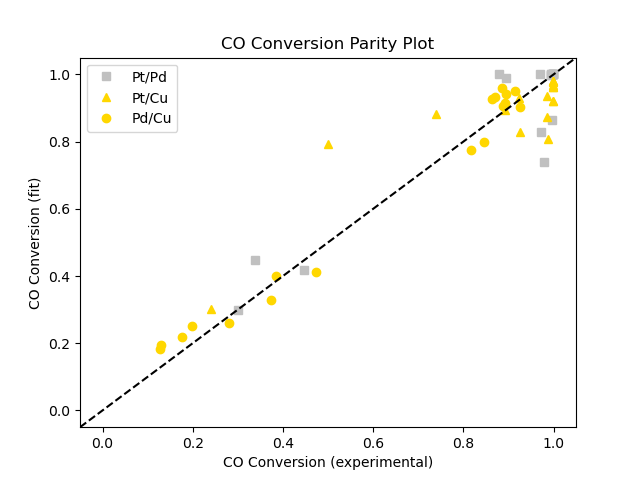

In [66]:
plt.figure() #CO Conv

plt.plot(OG_PtPd_X_CO_vals,PtPd_X_CO_vals,'s', color="silver",label='Pt/Pd')

plt.plot(OG_PtCu_X_CO_vals,PtCu_X_CO_vals,'^', color="#FFD700", label='Pt/Cu')

plt.plot(OG_PdCu_X_CO_vals,PdCu_X_CO_vals,'o', color="#FFD700", label='Pd/Cu')


# Draw a y=x line
plt.axline((0, 0), slope=1,color = 'k',linestyle='--')

plt.title('CO Conversion Parity Plot')
plt.xlabel(r'CO Conversion (experimental)')
plt.ylabel("CO Conversion (fit)")
plt.legend(loc='best')

plt.show()

<IPython.core.display.Javascript object>


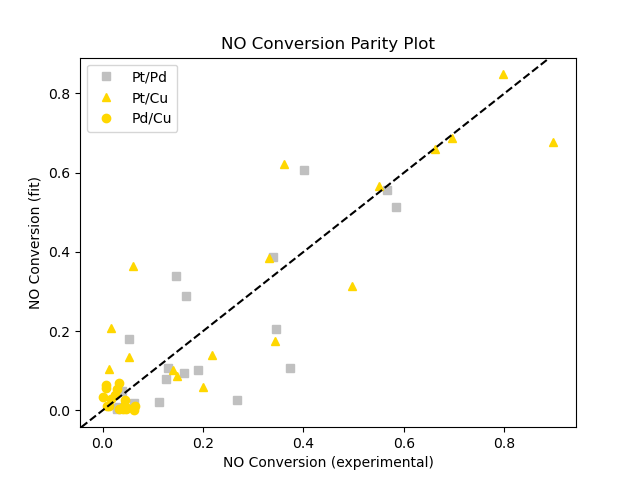

In [67]:
plt.figure() #NO Conv

plt.plot(OG_PtPd_X_NO_vals,PtPd_X_NO_vals,'s', color="silver",label='Pt/Pd')

plt.plot(OG_PtCu_X_NO_vals,PtCu_X_NO_vals,'^', color="#FFD700", label='Pt/Cu')

plt.plot(OG_PdCu_X_NO_vals,PdCu_X_NO_vals,'o', color="#FFD700", label='Pd/Cu')


# Draw a y=x line
plt.axline((0, 0), slope=1,color = 'k',linestyle='--')

plt.title('NO Conversion Parity Plot')
plt.xlabel(r'NO Conversion (experimental)')
plt.ylabel("NO Conversion (fit)")
plt.legend(loc='best')

plt.show()

<IPython.core.display.Javascript object>


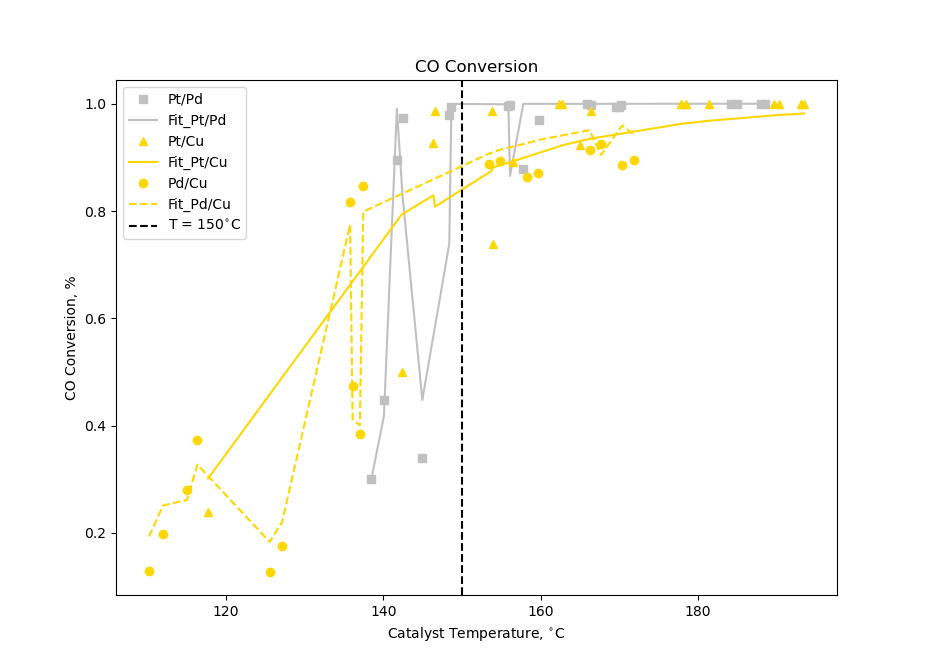

In [58]:
plt.figure() #CO Conv

plt.plot(OG_Temp_PtPd,OG_PtPd_X_CO_vals,'s', color="silver",label='Pt/Pd') 
plt.plot(Temp_PtPd, PtPd_X_CO_vals,'-', color="silver",label='Fit_Pt/Pd')

plt.plot(OG_Temp_PtCu,OG_PtCu_X_CO_vals,'^', color="#FFD700", label='Pt/Cu')
plt.plot(Temp_PtCu, PtCu_X_CO_vals,'-', color="#FFD700", label='Fit_Pt/Cu')

plt.plot(OG_Temp_PdCu,OG_PdCu_X_CO_vals,'o', color="#FFD700", label='Pd/Cu')
plt.plot(Temp_PdCu, PdCu_X_CO_vals,'--', color="#FFD700", label='Fit_Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('CO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("CO Conversion, %")
plt.legend(loc='best')

plt.show()

<IPython.core.display.Javascript object>


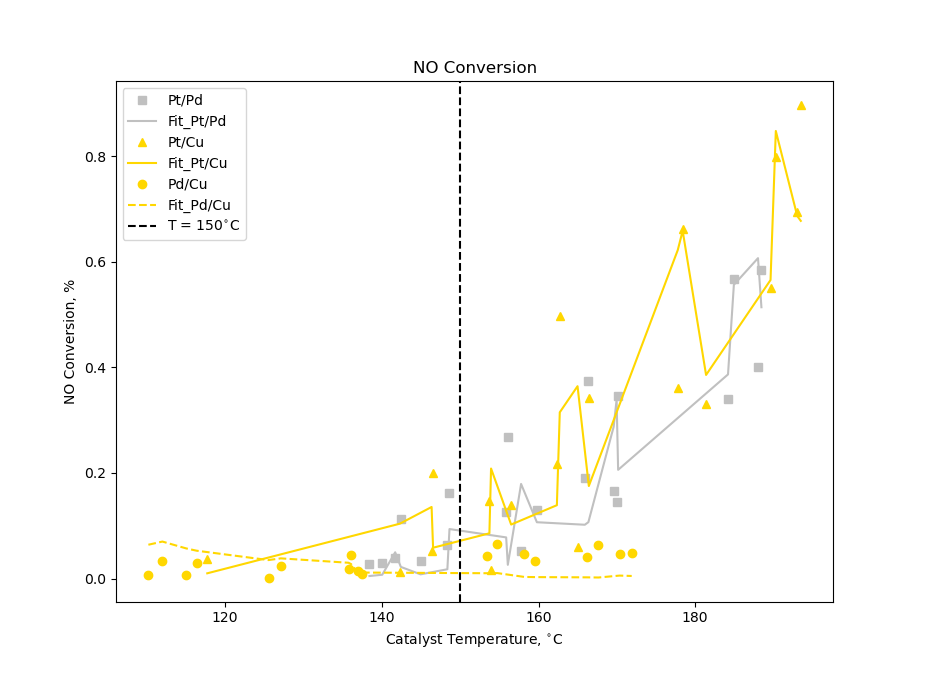

In [60]:
plt.figure() #NO Conv
##Remember to add feed conditions and 150 C line

plt.plot(OG_Temp_PtPd, OG_PtPd_X_NO_vals,'s', color="silver",label='Pt/Pd')
plt.plot(Temp_PtPd, PtPd_X_NO_vals,'-', color="silver",label='Fit_Pt/Pd')

plt.plot(OG_Temp_PtCu,OG_PtCu_X_NO_vals,'^', color="#FFD700", label='Pt/Cu')
plt.plot(Temp_PtCu, PtCu_X_NO_vals,'-', color="#FFD700", label='Fit_Pt/Cu')

plt.plot(OG_Temp_PdCu,OG_PdCu_X_NO_vals,'o', color="#FFD700", label='Pd/Cu')
plt.plot(Temp_PdCu, PdCu_X_NO_vals,'--', color="#FFD700", label='Fit_Pd/Cu')

# Draw a vertical line at x=150
plt.axvline(x=150,color = 'k',linestyle='--',label=r'T = 150$^{\circ}$C')

plt.title('NO Conversion')
plt.xlabel(r'Catalyst Temperature, $^{\circ}$C')
plt.ylabel("NO Conversion, %")
plt.legend(loc='best')
plt.show()

In [61]:
PtPd_params

array([2.39944909e+04, 2.82879886e+00, 3.72508410e-01, 2.04870932e+01,
       1.51703417e-02, 2.10621971e+01, 3.81749183e+03, 3.57173999e+01,
       3.98948791e+03, 2.92732848e+02, 4.23881412e+02, 3.37594618e+02,
       1.50452706e+04, 1.34984260e+00, 1.10294490e-02, 3.70999575e+02,
       6.75349585e+01, 2.71827812e+02, 1.30292127e+02, 2.19698139e+03])

In [62]:
PtCu_params

array([8.95296510e+02, 4.97704124e+00, 1.69664888e+02, 5.23792990e+03,
       3.49646158e+03, 4.08930375e+00, 1.95498341e+03, 6.64132477e+01,
       1.99936778e+03, 1.49819142e+02, 6.90991195e-01, 2.15642110e+02,
       2.39196015e+02, 5.55758103e-03, 4.35265350e-04, 3.13900481e+02,
       8.94929777e+01, 6.86497968e+02, 6.88102420e+01, 7.54943375e+02])

In [63]:
PdCu_params

array([1.21353752e+04, 4.66459523e-01, 1.99784329e+02, 9.11813720e+03,
       1.21859944e+01, 9.37916977e+02, 2.42017433e+03, 3.72238986e+03,
       1.02268780e+04, 1.92796615e+02, 4.33672845e+00, 1.33293358e+02,
       2.75404676e+04, 2.13206582e+00, 4.55130558e+01, 1.89943663e+03,
       1.81561019e+03, 2.88068110e+01, 1.49268994e+00, 1.84687570e+03])